In [2]:
from math import *
import numpy as np
from scipy.optimize import fsolve
import matplotlib
import matplotlib.pyplot as plt

print("Sucess!")

Sucess!


delta_t_max = 0.0036 [m]
We can roll in one pass: False

epsilon = 0.1054 []
Power for first stage: 167.5083 [kW]
Power for second stage: 172.0529 [kW]
Total power: 339.5612 [kW]

sucess!


'Minimum power: 334.26 [kW]'

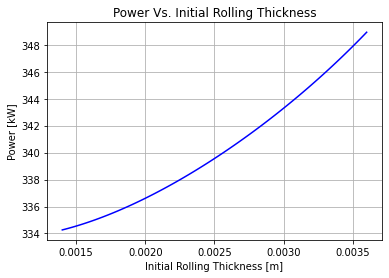

In [15]:
# Question1

w0 = 300E-3 # [m]
t0 = 25E-3 # [m]

R = 250E-3 # [m]
N = 50 # [rpm]

k = 275E6 # [Pa]
n = 0.15
mu = 0.12

# --------------------- Pt A ---------------------
# Can we reduce thickness to 20mm in one pass?

delta_t_max = mu**2 * R
print("delta_t_max = %0.4f [m]" % delta_t_max)
delta_t = t0 - 20E-3
canRoll = delta_t < delta_t_max
print("We can roll in one pass: %r" % canRoll)

# --------------------- Pt B ---------------------
# How much power do we need for multistage rolling operation?
# Recall we have power = torque * omega = (2*pi*N/60)*R*(h0-hf)*width*((k*epsilon**n)/(1+n))
# Also recall epsilon = ln(hf/h0)

delta_t = 2.5E-3
t1 = t0 - delta_t

epsilon = abs(log(t1/t0))
print("\nepsilon = %0.4f []" % epsilon)

power1 = (2*pi*N/60) * R * (t0 - t1) * w0 * ((k*(epsilon**n))/(1+n))
print("Power for first stage: %0.4f [kW]" % (power1/1000))

# Compute for second roller
# We need to compute new width
slip = 0.1
ratio = 1+slip
fxn = lambda x: (t0 * w0) - (t1 * x) * ratio
w1 = fsolve(fxn, 0.3)
# print("Width from first roller = %0.4f [m]" % w1)

t2 = t1 - delta_t
epsilon = abs(log(t2/t1))

power2 = (2*pi*N/60) * R * (t1 - t2) * w1 * ((k*(epsilon**n))/(1+n))
print("Power for second stage: %0.4f [kW]" % (power2/1000))
print("Total power: %0.4f [kW]" % ((power1 + power2)/1000))


# --------------------- Pt C ---------------------
# Optimize the process for minimum power

num_points = 100
# Go from first roller doing minimum allowable rolling to maximum allowable rolling
initial_delta_t = np.linspace((5E-3 - delta_t_max), delta_t_max, num_points)
power = np.zeros(num_points)

for i, delta_t in enumerate(initial_delta_t):
    
    #print(delta_t)

    t1 = t0 - delta_t
    epsilon = abs(log(t1/t0))
    power1 = (2*pi*N/60) * R * (t0 - t1) * w0 * ((k*(epsilon**n))/(1+n))
    #print("power1 = %0.4f" % (power1/1000))
    
    fxn = lambda x: (t0 * w0) - (t1 * x) * ratio
    w1 = fsolve(fxn, 0.3)
    
    delta_t = (t0 - delta_t) - 20E-3 # Compute how much delta_t the second roller has to do
    #print("delta_t = %0.4f" % delta_t)
    
    t2 = t1 - delta_t
    epsilon = abs(log(t2/t1))
    power2 = (2*pi*N/60) * R * (t1 - t2) * w1 * ((k*(epsilon**n))/(1+n))
    #print("power2 = %0.4f" % (power2/1000))
    
    power[i] = power1 + power2
    #print("total power = %0.4f" % (power[i]/1000))
    
print("\nsucess!")
    
fig, ax = plt.subplots()
ax.plot(initial_delta_t, (power/1000), 'b-')
plt.title("Power Vs. Initial Rolling Thickness")
plt.xlabel("Initial Rolling Thickness [m]")
plt.ylabel("Power [kW]")
# ax.set_xlim(delta_t_max, (5E-3 - delta_t_max))  # decreasing thickness
plt.grid(True)

# Try out the fancy fstring formatting
f"Minimum power: {(power[0]/1000):0.2f} [kW]"



k_f = 1.0267 []
A0 = 0.0020 [m^2]
Force at 0.0620 [m]: 532.2 [kN]
Force at 0.0490 [m]: 610.2 [kN]
Force at 0.0360 [m]: 669.4 [kN]


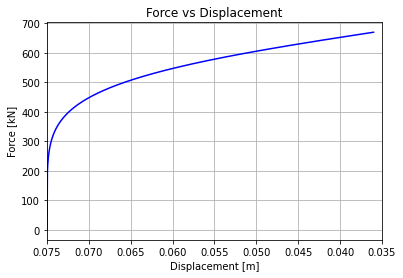

In [11]:
# Question2

h0 = 75E-3
dia0 = 50E-3

K = 350E6
n = 0.17
mu = 0.1

# Recall we have F = K_f * K * epsilon**n * A0
# Open die forging --> K_f = 1 + (0.4 * mu * dia0)/h0
K_f = 1 + (0.4 * mu * dia0)/h0
print("k_f = %0.4f []" % K_f)

A0 = pi/4 * dia0**2
print("A0 = %0.4f [m^2]" % A0)

num_points = 1000
heights = np.linspace(75E-3, 36E-3, num_points)
forces = np.zeros(num_points)

for i, h in enumerate(heights):
    
    epsilon_x = abs(log(h/h0))
    forces[i] = K_f * K * epsilon_x**n * A0
    #print("Force at %0.4f [m]: %0.4f [N]" % (h, F_x))

fig, ax = plt.subplots()
ax.plot(heights, (forces/1000), 'b-')
ax.set_xlim(h0, 35E-3)  # decreasing thickness
plt.title("Force vs Displacement")
plt.xlabel("Displacement [m]")
plt.ylabel("Force [kN]")
plt.grid(True)


# --------------------- Compute the specific ones the assignment asks for ---------------------
heights = [62E-3, 49E-3, 36E-3]

for i, h in enumerate(heights):
    
    epsilon_x = abs(log(h/h0))
    F_x = K_f * K * epsilon_x**n * A0
    print("Force at %0.4f [m]: %0.1f [kN]" % (h, F_x/1000))

